In [ ]:
import numpy as np

In [ ]:
def payoff(S, K):
    return (S-K) if S > K else 0

In [ ]:
def Price(asset, volatility, intRate, strike, expiry, noSteps):
  s = np.zeros((noSteps+1))
  v = np.zeros((noSteps+1))
  time_step = float(expiry / noSteps)
  DiscountFactor = np.exp(-intRate * time_step)
  temp1 = np.exp((intRate + volatility * volatility) * time_step)
  temp2 = 0.5 * (DiscountFactor + temp1)
  u = temp2 + np.sqrt(temp2 * temp2 - 1)
  d=1/u
  p = (np.exp(intRate * time_step) - d) / (u - d)

  s[0]= asset
  for i in range(1,noSteps+1):
    for j in range(i, 0, -1):
      s[j] = u * s[j-1]
    s[0] = d * s[0]

  for j in range(noSteps+1):
        v[j] = payoff(s[j], strike)   

  for n in range(noSteps):
        for j in range(noSteps):
            v[j] = ((p * v[j+1]) + ((1-p) * v[j])) * DiscountFactor

  return v[0]

[18.12692472 18.12692473 18.12692474 18.12692475 18.12692477 18.12692479
 18.12692481 18.12692484 18.12692487 18.12692491 18.12692496 18.12692502
 18.12692509 18.12692517 18.12692527 18.12692538 18.12692552 18.12692568
 18.12692586 18.12692607 18.12692632 18.1269266  18.12692693 18.12692731
 18.12692774 18.12692824 18.12692881 18.12692946 18.12693019 18.12693102
 18.12693196 18.12693302 18.12693422 18.12693557 18.12693707 18.12693876
 18.12694065 18.12694275 18.12694509 18.12694769 18.12695058 18.12695377
 18.1269573  18.1269612  18.12696549 18.12697022 18.1269754  18.12698109
 18.12698732 18.12699414 18.12700157 18.12700968 18.12701852 18.12702812
 18.12703855 18.12704986 18.12706212 18.12707537 18.1270897  18.12710517
 18.12712184 18.12713979 18.1271591  18.12717985 18.12720212 18.127226
 18.12725158 18.12727894 18.12730819 18.12733943 18.12737275 18.12740827
 18.1274461  18.12748634 18.12752911 18.12757453 18.12762273 18.12767383
 18.12772796 18.12778526 18.12784585 18.12790988 18.1

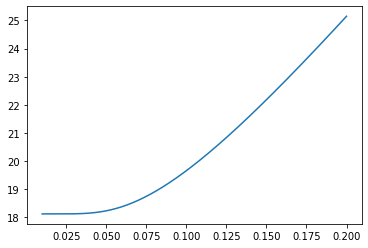

In [ ]:
if __name__ == '__main__':
    import time   
    import matplotlib.pyplot as plt
 
    v_rates = np.linspace(.01, 0.2, 1000)    
    option_prices = np.zeros_like(v_rates)
    asset = 100
    strike = 100
    intRate = .05
    expiry = 4
    noSteps = 12
 
    t = time.time()
    for i, volatility in enumerate(v_rates):
        option_prices[i] = Price(asset, volatility, intRate, strike, expiry, noSteps)   #217.58, 215, 0.05, 0.1, 40

    plt.plot(v_rates, option_prices)
    plt.show()